In [1]:
import pandas as pd

# 加载数据
df1 = pd.read_csv("data1.csv")
df2 = pd.read_csv("data2.csv")

# 打印df1的所有列名
print("df1列名:")
print(df1.columns)

# 打印df2的所有列名
print("\ndf2列名:")
print(df2.columns)
df1 = pd.read_csv("data1.csv")
df2 = pd.read_csv("data2.csv")

df1列名:
Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'Y(1=default, 0=non-default)'],
      dtype='object')

df2列名:
Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'Y(1=default, 0=non-default)'],
      dtype='object')


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 加载数据
df1 = pd.read_csv("data1.csv")
df2 = pd.read_csv("data2.csv")

# 假设'x'列是输入特征，'y'列是输出标签
# 注意：这里你需要将'x'和'y'替换为实际的列名
# 假设'X1'到'X<n>'是特征列，'Y(1=default, 0=non-default)'是标签列

# 对于df1
X1 = df1.loc[:, 'X1':'X24']  # 选择从X1到X24的所有列作为特征
y1 = df1['Y(1=default, 0=non-default)']  # 选择标签列

# 对于df2
X2 = df2.loc[:, 'X1':'X14']  # 选择从X1到X14的所有列作为特征（因为df2只有这些特征列）
y2 = df2['Y(1=default, 0=non-default)']  # 选择标签列，与df1相同

# 接下来的模型训练和评估步骤可以使用X1, y1, X2, y2作为输入和输出

# 定义分类器
classifiers = {
    'DecisionTree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'RandomForest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(kernel='linear', probability=True, random_state=42)
}

# 函数来训练和评估模型
def train_and_evaluate_model(X, y, classifier_name, classifier):
    scores = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')
    return scores.mean(), scores.std()

# 对数据集df1进行评估
results_df1 = {}
for name, classifier in classifiers.items():
    mean_score, std_score = train_and_evaluate_model(X1, y1, name, classifier)
    results_df1[name] = (mean_score, std_score)

# 对数据集df2进行评估
results_df2 = {}
for name, classifier in classifiers.items():
    mean_score, std_score = train_and_evaluate_model(X2, y2, name, classifier)
    results_df2[name] = (mean_score, std_score)

# 打印结果
print("Dataset 1 (df1) Results:")
for name, (mean, std) in results_df1.items():
    print(f"{name}: Mean Accuracy = {mean:.3f} (+/- {std:.3f})")

print("\nDataset 2 (df2) Results:")
for name, (mean, std) in results_df2.items():
    print(f"{name}: Mean Accuracy = {mean:.3f} (+/- {std:.3f})")

# 你还可以进一步分析每个模型的混淆矩阵、ROC曲线、AUC等指标import pandas as pd
# Import the excel file and call it xls_file
df1 = pd.read_csv("data1.csv")
df2 = pd.read_csv("data2.csv")

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
# 打印更新后的df
    print(df1)

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
# 打印更新后的df
    print(df2)

KeyboardInterrupt: 

# 为了提高模型训练速度，下面是一个简化版本

In [7]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

# 加载数据
df1 = pd.read_csv("data1.csv")
df2 = pd.read_csv("data2.csv")

# 准备数据
X1 = df1.loc[:, 'X1':'X24']
y1 = df1['Y(1=default, 0=non-default)']
X2 = df2.loc[:, 'X1':'X14']
y2 = df2['Y(1=default, 0=non-default)']

# 特征选择
selector = SelectKBest(f_classif, k=10)  # 选择最重要的10个特征
X1_selected = selector.fit_transform(X1, y1)
X2_selected = selector.fit_transform(X2, y2)

# 定义分类器（只使用较快的模型）
classifiers = {
    'DecisionTree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'RandomForest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(kernel='linear', probability=True, random_state=42)
}

# 函数来训练和评估模型
def train_and_evaluate_model(X, y, classifier_name, classifier):
    scores = cross_val_score(classifier, X, y, cv=3, scoring='accuracy')  # 使用3折交叉验证
    return scores.mean(), scores.std()

# 评估模型
for dataset_name, X, y in [("df1", X1_selected, y1), ("df2", X2_selected, y2)]:
    print(f"\nDataset: {dataset_name}")
    for name, classifier in classifiers.items():
        mean_score, std_score = train_and_evaluate_model(X, y, name, classifier)
        print(f"{name}: Mean Accuracy = {mean_score:.3f} (+/- {std_score:.3f})")


Dataset: df1
DecisionTree: Mean Accuracy = 0.694 (+/- 0.013)
KNN: Mean Accuracy = 0.712 (+/- 0.007)
RandomForest: Mean Accuracy = 0.752 (+/- 0.013)
SVM: Mean Accuracy = 0.754 (+/- 0.013)

Dataset: df2
DecisionTree: Mean Accuracy = 0.777 (+/- 0.012)
KNN: Mean Accuracy = 0.678 (+/- 0.013)
RandomForest: Mean Accuracy = 0.861 (+/- 0.014)


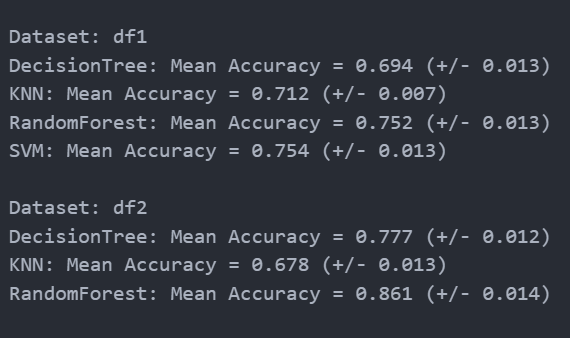